<a href="https://colab.research.google.com/github/priyankadeep/Analysis-of-Ted-Talks/blob/main/Data_Science_Project_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#making all the necessary imports
import pandas as pd
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading the data into dataframes
df_transcript=pd.read_csv("/content/drive/MyDrive/IMT-574 /Project 1/data/transcripts.csv")
df_main=pd.read_csv("/content/drive/MyDrive/IMT-574 /Project 1/data/ted_main.csv")

### Data Exploration


In [ ]:
df_main.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

In [ ]:
# Since we are concerned with the ratings column for sentiment analysis, we are exploring the ratings column
df_main['ratings'][0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [ ]:
# df_main['ratings'] contains JSON string representations of the list of dictionaries for each row

# Function to fix JSON string and sort the ratings in descending order
def sort_ratings(row):
    ratings_json_fixed = row.replace("'", '"')
    ratings_list = json.loads(ratings_json_fixed)
    sorted_ratings = sorted(ratings_list, key=lambda x: x['count'], reverse=True)
    return sorted_ratings

# Apply the function to each row of the 'ratings' column and store the sorted ratings in a new column 'sorted_ratings'
df_main['sorted_ratings'] = df_main['ratings'].apply(sort_ratings)

In [ ]:
# checking the output
df_main.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,sorted_ratings
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,"[{'id': 10, 'name': 'Inspiring', 'count': 2492..."
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i..."
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i..."
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,"[{'id': 10, 'name': 'Inspiring', 'count': 1070..."
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,"[{'id': 8, 'name': 'Informative', 'count': 543..."


In [ ]:
df_main['sorted_ratings'][0]

[{'id': 10, 'name': 'Inspiring', 'count': 24924},
 {'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 26, 'name': 'Obnoxious', 'count': 209}]

In [ ]:
# counting the total values of ratings
len(df_main['sorted_ratings'][0])

14

In [ ]:
# creating a new column that contains the ratings_name
df_main['ratings_name'] = df_main['sorted_ratings'].apply(lambda x: [item['name'] for item in x])

In [ ]:
df_main['ratings_name'].head()

0    [Inspiring, Funny, Persuasive, Fascinating, In...
1    [Funny, Informative, Inspiring, Persuasive, Un...
2    [Funny, Informative, Inspiring, Persuasive, In...
3    [Inspiring, Courageous, Persuasive, Informativ...
4    [Informative, Fascinating, Jaw-dropping, Ingen...
Name: ratings_name, dtype: object

### Sentiment Analysis

In [ ]:
from textblob import TextBlob
# Function to perform sentiment analysis on a list of top 5 names
def analyze_sentiment(names):
    # Convert the list of top 3 names to a single string
    names_text = ' '.join(names[0:3])
    # Perform sentiment analysis on the text
    blob = TextBlob(names_text)
    sentiment = blob.sentiment.polarity
    # Determine the sentiment label
    if sentiment > 0:
        sentiment_label = 'positive'
    elif sentiment < 0:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'  # In case sentiment polarity is exactly 0
    return sentiment_label

# Apply the sentiment analysis function to each row in the 'names_list' column
df_main['sentiment_of_top_three_words'] = df_main['ratings_name'].apply(analyze_sentiment)

In [ ]:
# Function to perform sentiment analysis on a list of top 5 names
def analyze_sentiment(names):
    # Convert the list of top 5 names to a single string
    names_text = ' '.join(names[0:5])
    # Perform sentiment analysis on the text
    blob = TextBlob(names_text)
    sentiment = blob.sentiment.polarity
    # Determine the sentiment label
    if sentiment > 0:
        sentiment_label = 'positive'
    elif sentiment < 0:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'  # In case sentiment polarity is exactly 0
    return sentiment_label

# Apply the sentiment analysis function to each row in the 'names_list' column
df_main['sentiment_of_top_five_words'] = df_main['ratings_name'].apply(analyze_sentiment)

In [ ]:
# Function to perform sentiment analysis on a list of top 10 names
def analyze_sentiment(names):
    # Convert the list of top 10 names to a single string
    names_text = ' '.join(names[0:10])
    # Perform sentiment analysis on the text
    blob = TextBlob(names_text)
    sentiment = blob.sentiment.polarity
    # Determine the sentiment label
    if sentiment > 0:
        sentiment_label = 'positive'
    elif sentiment < 0:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'  # In case sentiment polarity is exactly 0
    return sentiment_label

# Apply the sentiment analysis function to each row in the 'names_list' column
df_main['sentiment_of_top_ten_words'] = df_main['ratings_name'].apply(analyze_sentiment)


In [ ]:
# Function to perform sentiment analysis on a list of all the names
def analyze_sentiment(names):
    # Convert the list of all names to a single string
    names_text = ' '.join(names)
    # Perform sentiment analysis on the text
    blob = TextBlob(names_text)
    sentiment = blob.sentiment.polarity
    # Determine the sentiment label
    if sentiment > 0:
        sentiment_label = 'positive'
    elif sentiment < 0:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'  # In case sentiment polarity is exactly 0
    return sentiment_label

# Apply the sentiment analysis function to each row in the 'names_list' column
df_main['overall_sentiment'] = df_main['ratings_name'].apply(analyze_sentiment)

### Check the Results

In [ ]:
df_main['sentiment_of_top_three_words'].value_counts()

positive    2471
neutral       76
negative       3
Name: sentiment_of_top_three_words, dtype: int64

In [ ]:
df_main['sentiment_of_top_five_words'].value_counts()

positive    2547
negative       2
neutral        1
Name: sentiment_of_top_five_words, dtype: int64

In [ ]:
df_main['sentiment_of_top_ten_words'].value_counts()

positive    2550
Name: sentiment_of_top_ten_words, dtype: int64

In [ ]:
df_main['overall_sentiment'].value_counts()

positive    2550
Name: overall_sentiment, dtype: int64

In [ ]:
def top_three_names(words):
  return words[0:3]
df_main['top_three_words'] = df_main['ratings_name'].apply(top_three_names)

df_main.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,title,url,views,sorted_ratings,ratings_name,sentiment_of_top_three_words,sentiment_of_top_five_words,sentiment_of_top_ten_words,overall_sentiment,top_three_words
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,"[{'id': 10, 'name': 'Inspiring', 'count': 2492...","[Inspiring, Funny, Persuasive, Fascinating, In...",positive,positive,positive,positive,"[Inspiring, Funny, Persuasive]"
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[Funny, Informative, Inspiring, Persuasive, Un...",positive,positive,positive,positive,"[Funny, Informative, Inspiring]"
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,...,Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[Funny, Informative, Inspiring, Persuasive, In...",positive,positive,positive,positive,"[Funny, Informative, Inspiring]"
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,...,Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,"[{'id': 10, 'name': 'Inspiring', 'count': 1070...","[Inspiring, Courageous, Persuasive, Informativ...",positive,positive,positive,positive,"[Inspiring, Courageous, Persuasive]"
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,...,The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,"[{'id': 8, 'name': 'Informative', 'count': 543...","[Informative, Fascinating, Jaw-dropping, Ingen...",positive,positive,positive,positive,"[Informative, Fascinating, Jaw-dropping]"


In [ ]:
df_main['sentiment_of_top_three_words'].value_counts()

positive    2471
neutral       76
negative       3
Name: sentiment_of_top_three_words, dtype: int64

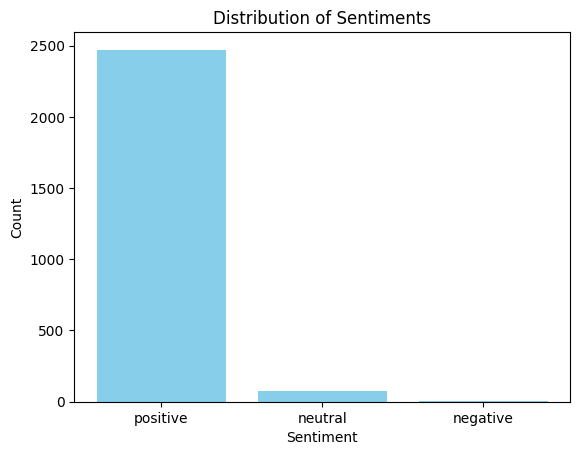

In [ ]:
import matplotlib.pyplot as plt

# Given sentiment data
sentiments = {
    'positive': 2471,
    'neutral': 76,
    'negative': 3
}

# Extract the sentiment labels and counts
labels = list(sentiments.keys())
counts = list(sentiments.values())

# Create a bar plot
plt.bar(labels, counts, color='skyblue')

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')

# Show the plot
plt.show()

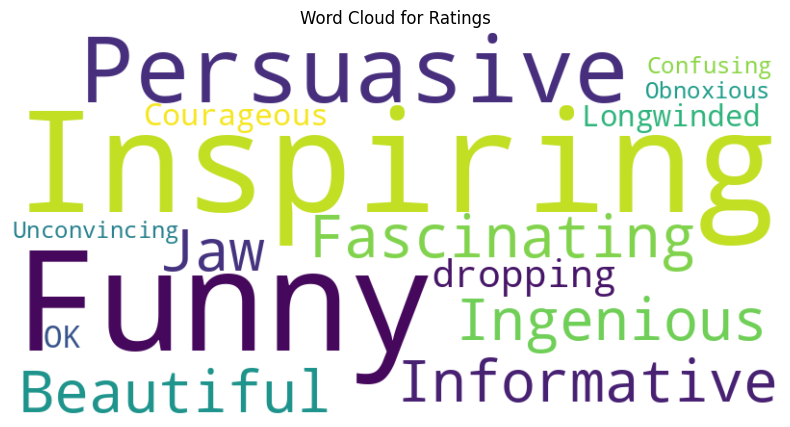

In [ ]:
# using a word cloud to see which words are the most occuring

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# List of words
word_list = df_main['ratings_name'][0]

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(word_list))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ratings')
plt.show()

### Running a SVC model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming df_main is your DataFrame containing 'top_three_words' and 'sentiment_of_top_three_words'

# Convert 'sentiment_of_top_three_words' to numerical labels
sentiment_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}
df_main['sentiment_label'] = df_main['sentiment_of_top_three_words'].map(sentiment_mapping)

# Split the data into training and testing sets
X = df_main['top_three_words'].apply(lambda x: ' '.join(x))
y = df_main['sentiment_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Support Vector Machine (SVM) classifier
clf = SVC(kernel='linear')
clf.fit(X_train_vectorized, y_train)

# Predict sentiment for a new TED Talk's top three words
new_talk_top_words = ['Persuasive', 'Informative', 'Courageous']  # Replace with actual top three words
new_talk_top_words_vectorized = vectorizer.transform(new_talk_top_words)
predicted_sentiment_label = clf.predict(new_talk_top_words_vectorized)

# Map numerical label back to sentiment category
reverse_sentiment_mapping = {v: k for k, v in sentiment_mapping.items()}
predicted_sentiment = reverse_sentiment_mapping[predicted_sentiment_label[0]]

print("Predicted sentiment of the new TED Talk:", predicted_sentiment)



Predicted sentiment of the new TED Talk: positive


In [ ]:
# using cross validation to get an idea of the model performance

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Define the pipeline with normalization and SVM classifier
pipeline = Pipeline([
    ('normalize', StandardScaler(with_mean=False)),  # Fix the error by setting with_mean=False
    ('clf', SVC(kernel='linear'))
])

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train_vectorized, y_train, cv=20)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print mean cross-validation score
mean_cv_score = cv_scores.mean()
print("Mean Cross-Validation Score:", mean_cv_score)


Cross-Validation Scores: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.99019608 1.
 0.99019608 0.99019608]
Mean Cross-Validation Score: 0.9985294117647061


In [ ]:
# using cross validation to get an idea of the model performance using random forest classifier

from sklearn.ensemble import RandomForestClassifier

# Define the pipeline with normalization and Random Forest classifier
pipeline_rf = Pipeline([
    ('normalize', StandardScaler(with_mean=False)),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))  # Using 100 decision trees
])

# Perform cross-validation
cv_scores_rf = cross_val_score(pipeline_rf, X_train_vectorized, y_train, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores (Random Forest):", cv_scores_rf)

# Calculate and print mean cross-validation score
mean_cv_score_rf = cv_scores_rf.mean()
print("Mean Cross-Validation Score (Random Forest):", mean_cv_score_rf)


Cross-Validation Scores (Random Forest): [0.99754902 0.99264706 1.         0.99754902 0.99264706]
Mean Cross-Validation Score (Random Forest): 0.996078431372549
